In [80]:
# %load readweather.py
import sqlite3 as lite
import pandas as pd 
import matplotlib.pyplot as plt  

con = lite.connect('weather3.db')
df = pd.read_sql('SELECT * FROM daily_temp', con)

#print df 

city_temp_range = df.max() - df.min()
print city_temp_range

day_of_reading    2505600.00
Atlanta                21.63
Austin                 20.90
Boston                 30.27
Chicago                34.18
Cleveland              26.48
dtype: float64


In [3]:
print df.describe()

       day_of_reading    Atlanta     Austin     Boston    Chicago  Cleveland
count    3.000000e+01  30.000000  30.000000  30.000000  30.000000  30.000000
mean     1.462073e+09  78.508000  81.186333  57.770000  61.692667  60.011333
std      7.606145e+05   5.638023   5.292642   8.822567   9.740732   7.153854
min      1.460820e+09  64.390000  69.500000  46.240000  47.620000  48.530000
25%      1.461446e+09  74.977500  76.825000  51.515000  54.487500  54.790000
50%      1.462073e+09  79.830000  82.775000  53.785000  63.500000  61.670000
75%      1.462699e+09  81.940000  85.012500  64.980000  67.585000  64.717500
max      1.463325e+09  86.020000  90.400000  76.510000  81.800000  75.010000


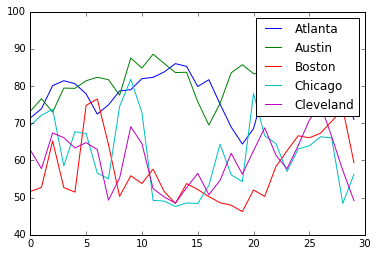

In [6]:
plt.figure()
plt.plot(df['Atlanta'])
plt.plot(df['Austin'])
plt.plot(df['Boston'])
plt.plot(df['Chicago'])
plt.plot(df['Cleveland'])
plt.legend()
plt.show()
%matplotlib inline

In [59]:
temp_change = collections.defaultdict(int)
for col in df.columns: #for loop cycling through each column
    city_temp_vals = df[col].tolist() #converts each column to a list
    city_temp_change = 0
    for k,v in enumerate(city_temp_vals):
        if k < len(city_temp_vals)-1:
            city_temp_change += abs(city_temp_vals[k] - city_temp_vals[k+1])
    temp_change[(col)] = city_temp_change 


        

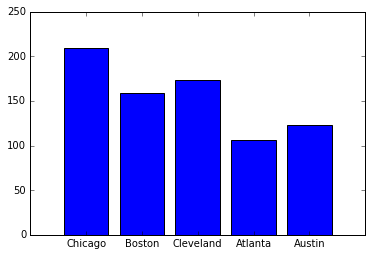

In [79]:
del temp_change['day_of_reading']
plt.bar(range(len(temp_change)), temp_change.values(), align='center')
plt.xticks(range(len(temp_change)), list(temp_change.keys()))
plt.show()